In [26]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [28]:
df = pd.read_csv("Titanic-Dataset.csv")

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


checking the info of this dataset

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## EDA

In [31]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [32]:
df.drop(columns='PassengerId',inplace=True)

In [33]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
536,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.55,B38,S
85,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.85,NaN,S
641,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
452,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.75,C111,C
208,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.75,NaN,Q


In [34]:
df['Cabin'].nunique()

147

<Figure size 640x480 with 0 Axes>

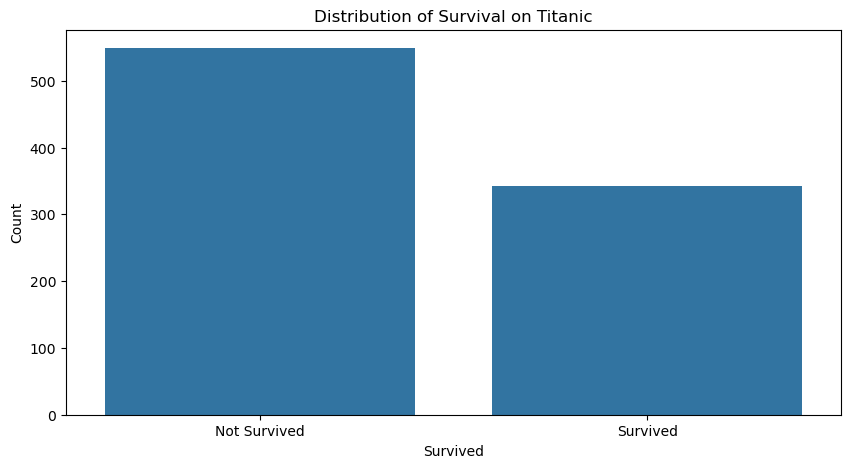

In [35]:
# Visualizing the distribution of the 'Survived' column
plt.figure()
fig ,ax = plt.subplots(figsize=(10, 5))
sns.countplot(x = 'Survived' , data = df ,ax =ax )
plt.title('Distribution of Survival on Titanic')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

In [36]:
df['Age'].isnull().sum()

177

In [37]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [38]:
df['Embarked'].isnull().sum()

2

In [39]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [40]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Sex', ylabel='count'>

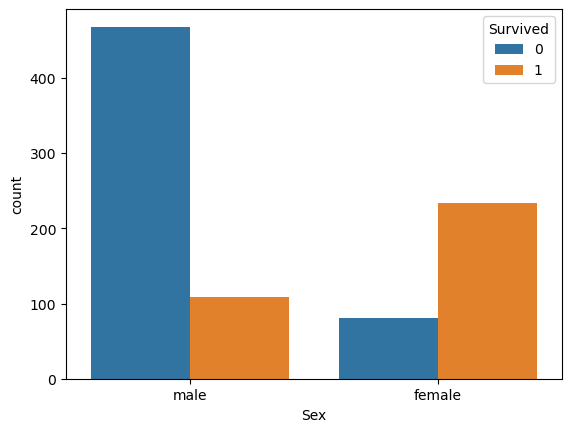

In [41]:
sns.countplot(data = df , x = 'Sex' , hue= 'Survived')

<Axes: xlabel='Embarked', ylabel='count'>

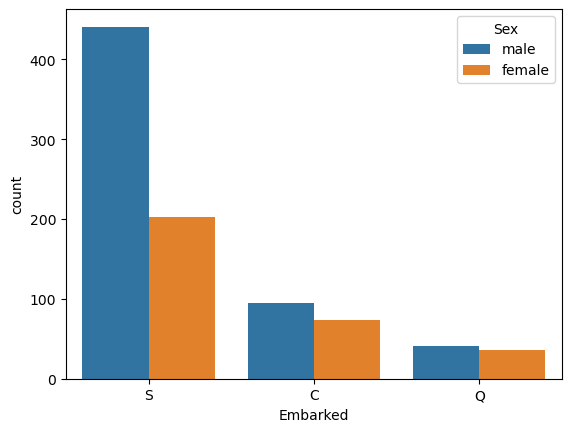

In [42]:
sns.countplot(x = 'Embarked' , data = df ,hue = 'Sex')

<Axes: xlabel='Pclass', ylabel='count'>

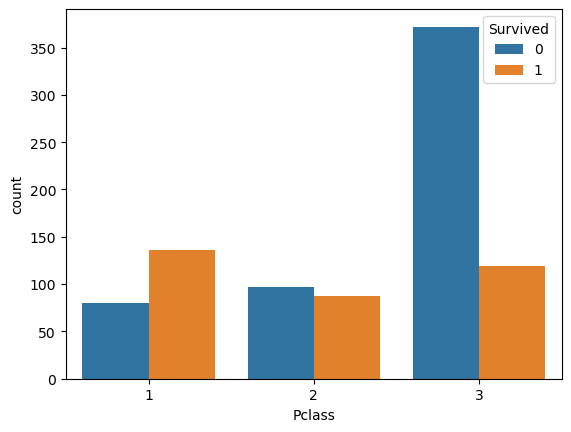

In [43]:
sns.countplot(data = df , x = 'Pclass' , hue = 'Survived')

<Axes: xlabel='Sex', ylabel='Survived'>

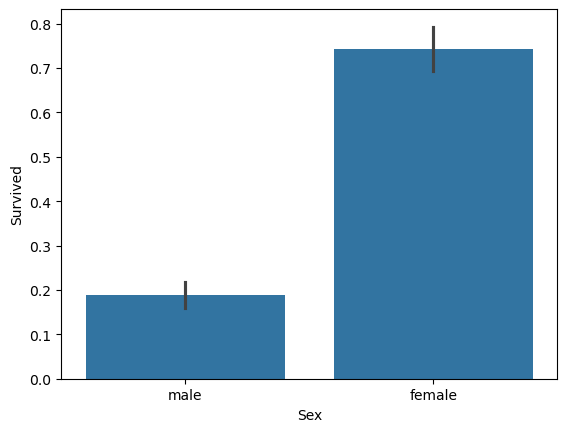

In [44]:
sns.barplot(data=df , x = 'Sex' , y = 'Survived')

In [45]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='Survived'>

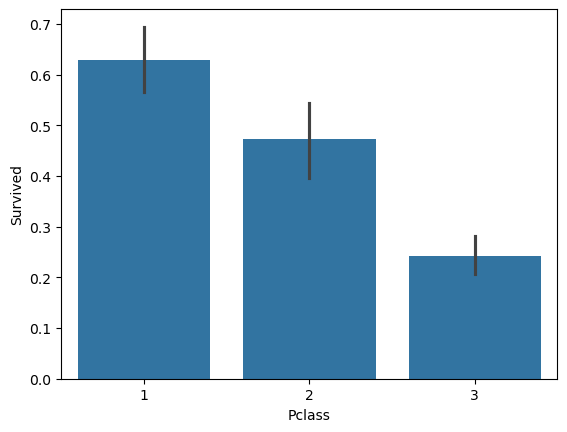

In [46]:
sns.barplot(data = df , x = 'Pclass' , y = 'Survived')

#### Plotting histograms to understand the distribution of age and fare

In [47]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

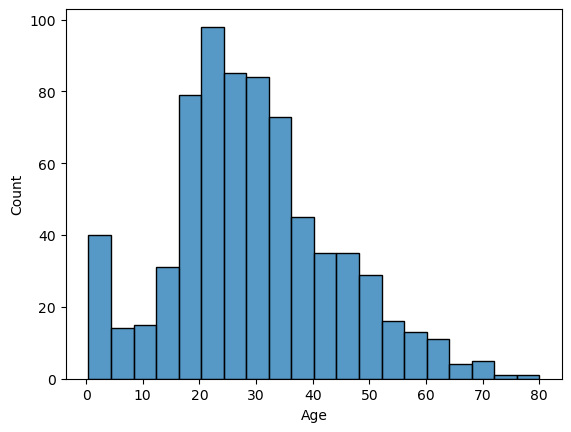

In [48]:
sns.histplot(data= df , x ='Age')

In [49]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

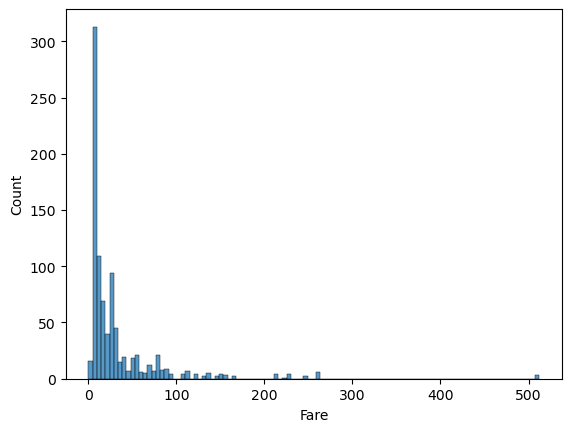

In [50]:
sns.histplot(data= df , x ='Fare')

<Axes: xlabel='Pclass', ylabel='Age'>

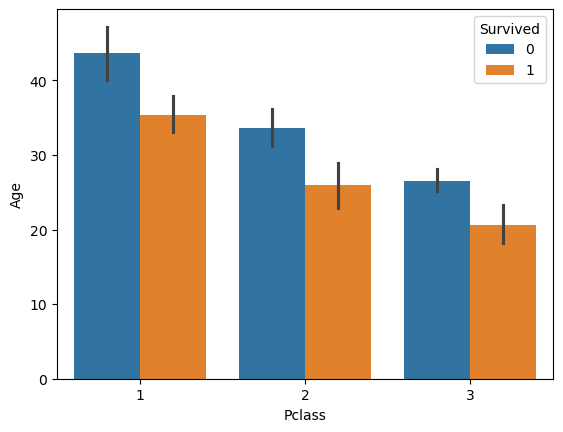

In [51]:
sns.barplot(data = df , x = 'Pclass' , y = 'Age' ,hue = 'Survived')

<Axes: ylabel='Density'>

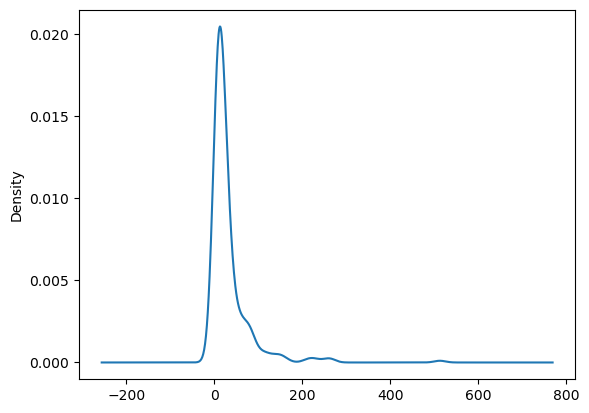

In [52]:
df['Fare'].plot(kind = 'kde')

<Axes: xlabel='Pclass'>

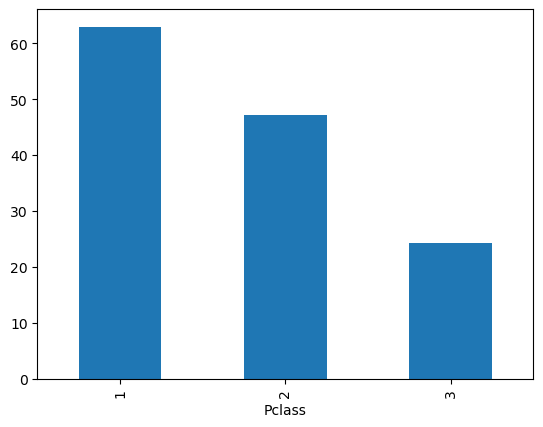

In [53]:
(df.groupby('Pclass')['Survived'].mean()*100).plot(kind = 'bar')

<Axes: xlabel='Sex'>

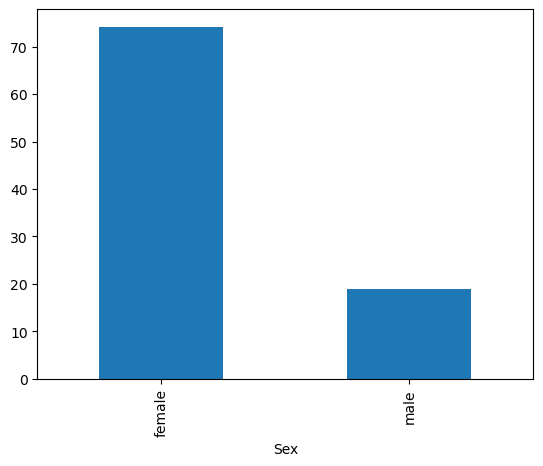

In [54]:
(df.groupby('Sex')['Survived'].mean()*100).plot(kind = 'bar')

<Axes: xlabel='Age', ylabel='Density'>

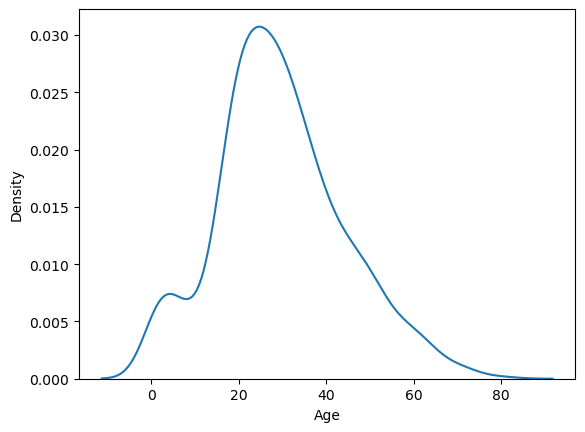

In [55]:
sns.kdeplot(df['Age'])

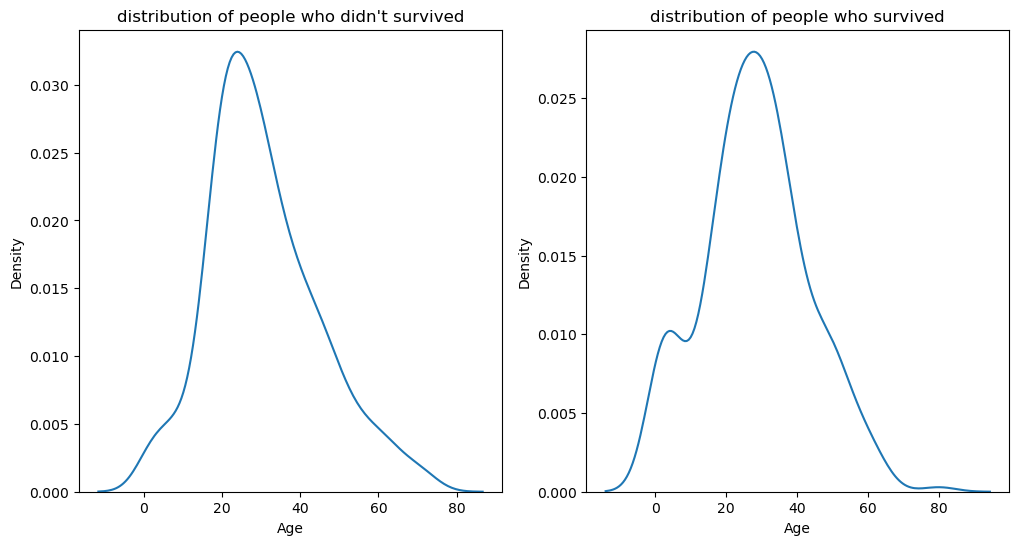

In [56]:
### plotting distplot 
fig = plt.figure(figsize = (12,6))
fig.add_subplot(1,2,1)
sns.kdeplot(df[df['Survived'] == 0]['Age'])
plt.title("distribution of people who didn't survived")

fig.add_subplot(1,2,2)
sns.kdeplot(df[df['Survived'] == 1]['Age'] )
plt.title("distribution of people who survived")
plt.show()

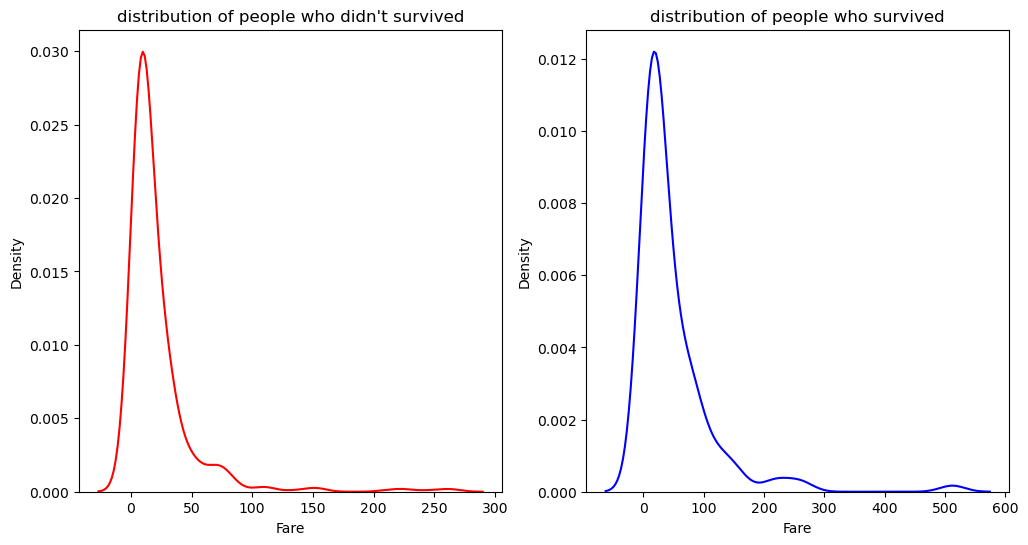

In [57]:
### plotting distplot 
fig = plt.figure(figsize = (12,6))
fig.add_subplot(1,2,1)
sns.kdeplot(df[df['Survived'] == 0]['Fare'] , color='red')
plt.title("distribution of people who didn't survived")

fig.add_subplot(1,2,2)
sns.kdeplot(df[df['Survived'] == 1]['Fare'] , color='blue' )
plt.title("distribution of people who survived")
plt.show()

<Axes: xlabel='Age', ylabel='Fare'>

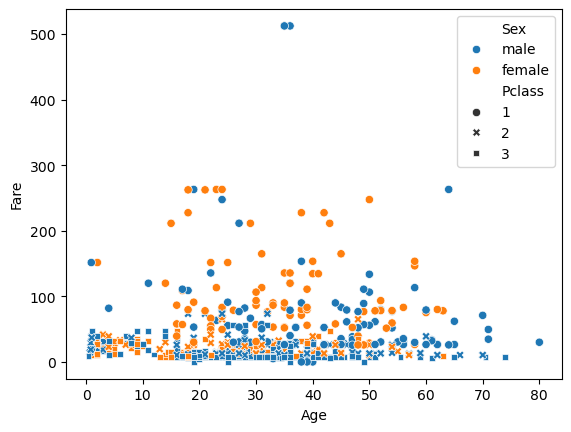

In [58]:
sns.scatterplot(data = df , x = 'Age' , y = 'Fare' , hue = 'Sex' ,style='Pclass')

#### plotting heatmap for correlation in the dataset

In [59]:
#correlation between two continuous variables.
df.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [60]:
pd.crosstab(df['Pclass'] , df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Survived', ylabel='Pclass'>

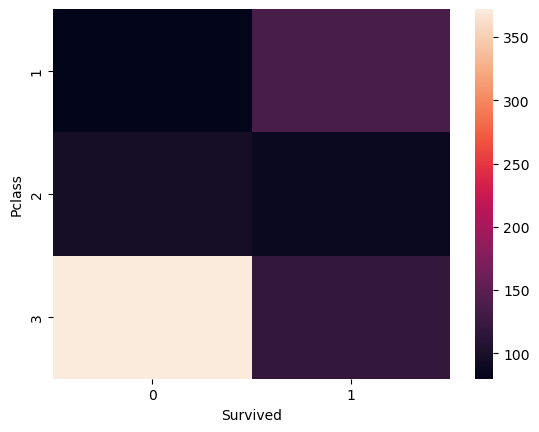

In [61]:
sns.heatmap(pd.crosstab(df['Pclass'] , df['Survived']))

### checking for outliers by boxplot

In [62]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
115,0,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,NaN,S
264,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
836,0,3,"Pasic, Mr. Jakob",male,21.0,0,0,315097,8.6625,NaN,S
312,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,NaN,S
467,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.5500,NaN,S


<Axes: ylabel='Age'>

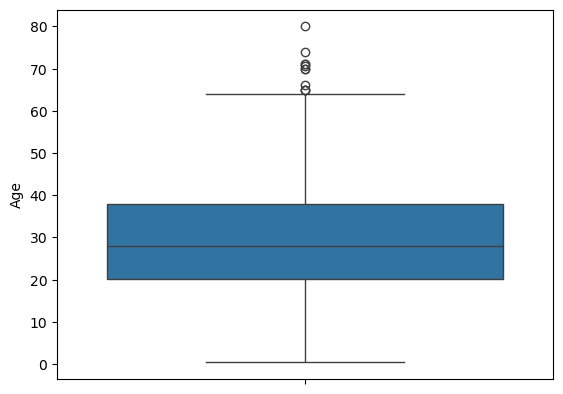

In [63]:
sns.boxplot(data=df , y = "Age")

<Axes: xlabel='Sex', ylabel='Age'>

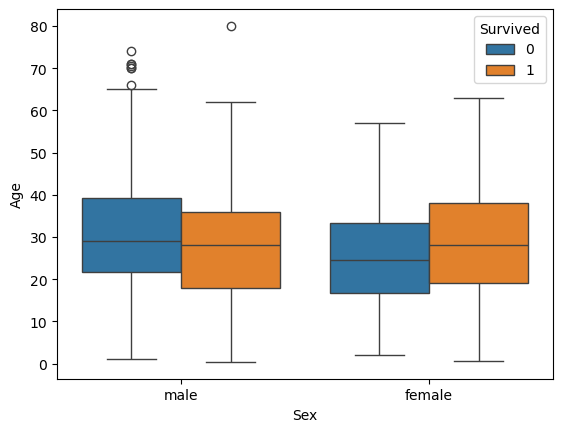

In [64]:
sns.boxplot(data = df , x = 'Sex',y = 'Age' , hue='Survived')

<Axes: ylabel='Fare'>

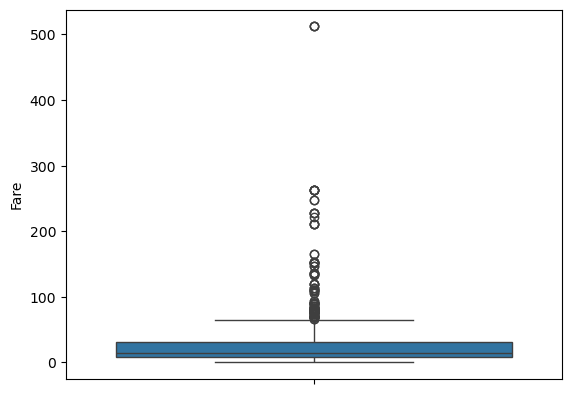

In [65]:
sns.boxplot(data=df , y = "Fare")

<Axes: xlabel='Sex', ylabel='Fare'>

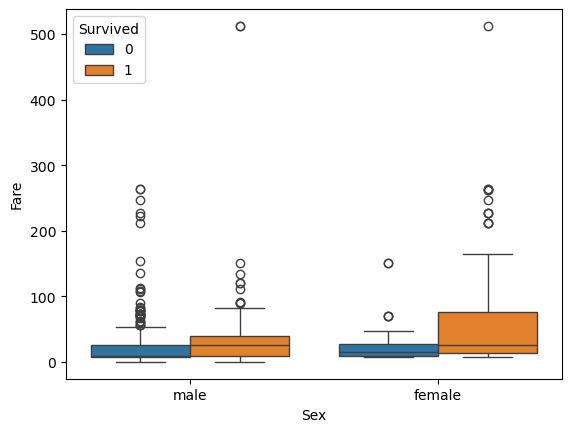

In [66]:
sns.boxplot(data=df , y = "Fare" ,x = 'Sex', hue='Survived')

In [67]:
df.groupby(['Sex' , 'Survived']).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

# Data Cleaning

In [68]:
df.isnull().mean()*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

##### age , cabin and embarked have missing values

## Splitting the data before data cleaning

In [69]:
X = df.drop(columns='Survived')
y = df['Survived']

In [70]:
print(X.shape , y.shape)

(891, 10) (891,)


In [71]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=123)

In [72]:
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
329,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C
749,3,"Connaghton, Mr. Michael",male,31.0,0,0,335097,7.7500,NaN,Q
203,3,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C
421,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
97,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
...,...,...,...,...,...,...,...,...,...,...
98,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S
322,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.3500,NaN,Q
382,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
365,3,"Adahl, Mr. Mauritz Nils Martin",male,30.0,0,0,C 7076,7.2500,NaN,S


In [73]:
y_train

329    1
749    0
203    0
421    0
97     1
      ..
98     1
322    1
382    0
365    0
510    1
Name: Survived, Length: 712, dtype: int64

### Removing Missing Values

In [74]:
X_train.isnull().mean()*100

Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         20.786517
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       78.089888
Embarked     0.280899
dtype: float64

In [75]:
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,712.000000,564.000000,712.000000,712.000000,712.000000
mean,2.324438,29.832908,0.512640,0.363764,32.388400
std,0.828513,14.317771,1.114971,0.767469,52.218079
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,13.500000
75%,3.000000,38.000000,1.000000,0.000000,30.070800
max,3.000000,80.000000,8.000000,5.000000,512.329200


In [76]:
imputer1 = SimpleImputer(strategy='most_frequent')
imputer2 = SimpleImputer(strategy='median')

In [77]:
trf = ColumnTransformer([
    ('imputer1' , imputer1 ,['Embarked']),
    ('imputer2' , imputer2 ,['Age'])
],remainder='passthrough')

In [78]:
trf.fit(X_train)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['Embarked']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Age'])])

In [79]:
X_train_new= trf.transform(X_train)
X_test_new = trf.transform(X_test)


In [80]:
new_columns = ['Embarked', 'Age'] + [col for col in X_train.columns if col not in ['Embarked', 'Age']]


In [81]:
X_train_new = pd.DataFrame(X_train_new, columns=new_columns)
X_test_new = pd.DataFrame(X_test_new, columns=new_columns)

In [82]:
X_train_new

,Embarked,Age,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin
0,C,16.0,1,"Hippach, Miss. Jean Gertrude",female,0,1,111361,57.9792,B18
1,Q,31.0,3,"Connaghton, Mr. Michael",male,0,0,335097,7.75,NaN
2,C,45.5,3,"Youseff, Mr. Gerious",male,0,0,2628,7.225,NaN
3,Q,21.0,3,"Charters, Mr. David",male,0,0,A/5. 13032,7.7333,NaN
4,C,23.0,1,"Greenfield, Mr. William Bertram",male,0,1,PC 17759,63.3583,D10 D12
...,...,...,...,...,...,...,...,...,...,...
707,S,34.0,2,"Doling, Mrs. John T (Ada Julia Bone)",female,0,1,231919,23.0,NaN
708,Q,30.0,2,"Slayter, Miss. Hilda Mary",female,0,0,234818,12.35,NaN
709,S,32.0,3,"Tikkanen, Mr. Juho",male,0,0,STON/O 2. 3101293,7.925,NaN
710,S,30.0,3,"Adahl, Mr. Mauritz Nils Martin",male,0,0,C 7076,7.25,NaN


In [83]:
# removing cabin because 78% values are missing (data is very sparse) not necessarily required
X_train_new.drop(columns='Cabin' , inplace=True)

In [84]:
X_train_new.sample(5)

,Embarked,Age,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
189,S,21.0,3,"Hansen, Mr. Henry Damsgaard",male,0,0,350029,7.8542
202,S,32.0,3,"Pickard, Mr. Berk (Berk Trembisky)",male,0,0,SOTON/O.Q. 392078,8.05
216,S,27.0,1,"Daniel, Mr. Robert Williams",male,0,0,113804,30.5
507,S,28.0,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,0,0,111427,26.55
112,Q,28.0,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,0,0,9234,7.75


<Axes: ylabel='Density'>

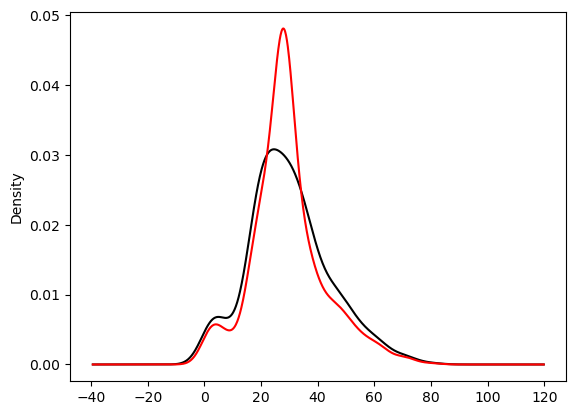

In [85]:
fig = plt.figure()
ax= fig.add_subplot(111)

X_train['Age'].plot(kind = 'kde' , ax =ax , color = 'black')

X_train_new['Age'].plot(kind = 'kde' , ax =ax , color = 'red')

##### distribution of age has changed more values are distributed at the center

<Axes: xlabel='Age'>

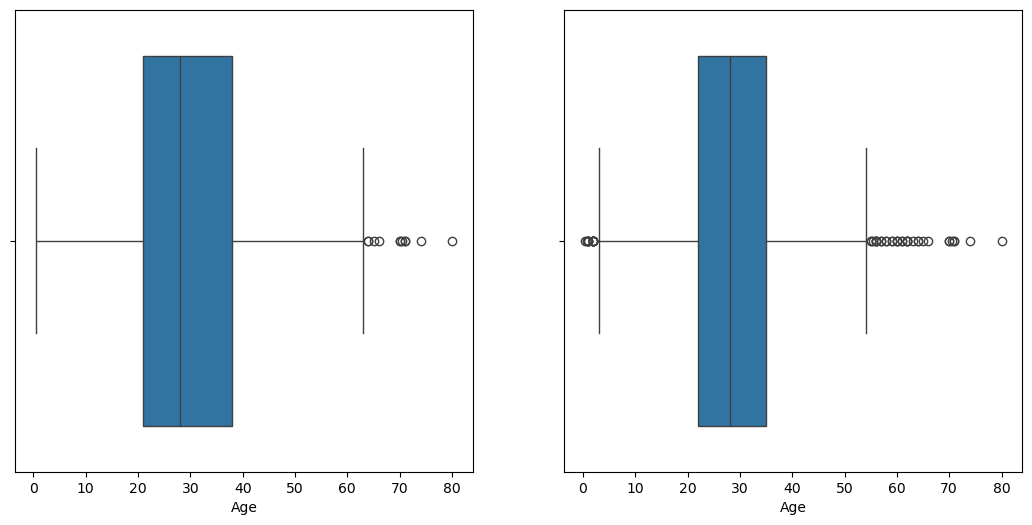

In [86]:
fig = plt.figure(figsize=(13 , 6))
fig.add_subplot(1,2,1)
sns.boxplot(data = X_train, x = 'Age')

fig.add_subplot(1,2,2)
sns.boxplot(data = X_train_new, x = 'Age')

##### outliers increased because of the median imputation 